In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
# load the primary dataset

dfa = pd.read_csv('E:\CC GENERAL.csv')
print(dfa.shape)
dfa.head()


(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# check against null values

dfa.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
#null values replaced with the mean of the affected column

mean = dfa['MINIMUM_PAYMENTS'].mean()
dfa['MINIMUM_PAYMENTS'].replace(np.NaN,mean, inplace = True)

In [6]:
# Null values are removed

dfa.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
mean = dfa['CREDIT_LIMIT'].mean()
dfa['CREDIT_LIMIT'].replace(np.NaN,mean, inplace = True)

In [8]:
dfa.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
# A segment of data selected, 
X = dfa.loc[:999]
print(X.shape)

(1000, 18)


In [11]:
# Dataframe without the customer id column
Z = X.iloc[:,1:9]
print(Z.shape)
Z.head()

(1000, 8)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333


In [12]:
# normalize data such that it ranges between (0-1) to eliminate bias for high values
from sklearn.preprocessing import normalize

scaled = normalize(Z)
dfc = pd.DataFrame(scaled, columns = Z.columns)
dfc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY
0,0.290114,0.005803,0.676683,0.000000,0.676683,0.000000,0.001182,0.000000
1,0.445099,0.000126,0.000000,0.000000,0.000000,0.895481,0.000000,0.000000
2,0.915914,0.000367,0.283814,0.283814,0.000000,0.000000,0.000367,0.000367
3,0.616266,0.000235,0.554268,0.554268,0.000000,0.076092,0.000031,0.000031
4,0.999617,0.001222,0.019559,0.019559,0.000000,0.000000,0.000102,0.000102


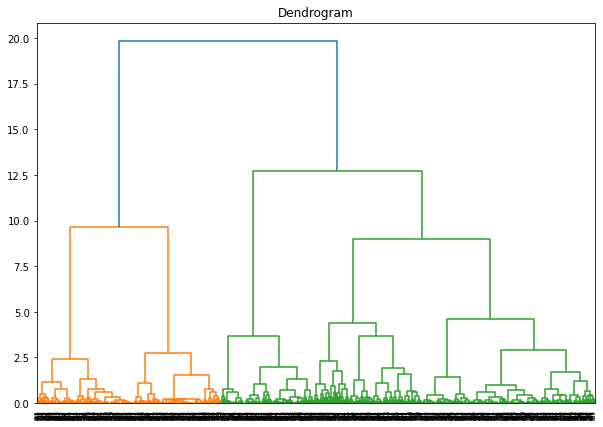

In [13]:
# plotting the dendrogram, with ward method that minimizes the variance

import scipy.cluster.hierarchy as shc
plt.figure(figsize =(10,7))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(dfc,method = 'ward'))

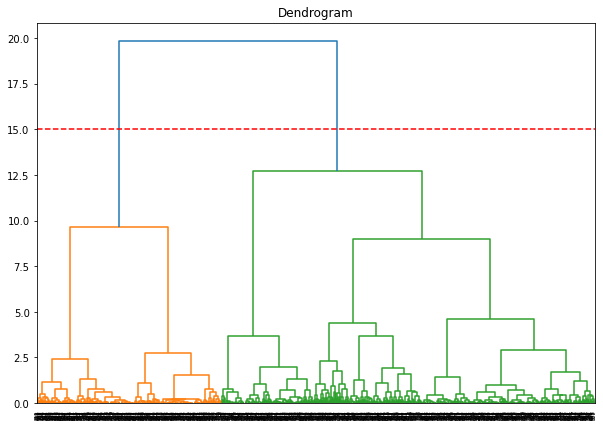

In [14]:
# choosing the two(2) clusters to work with
plt.figure(figsize =(10,7))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(dfc,method = 'ward'))
plt.axhline(y=15,color='red',linestyle='--')
plt.show()

In [15]:
# fit the data into the agglomerative algorithm of HC

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

In [16]:
# form clusters for clients

print(cluster.fit_predict(dfc).shape)
predict = cluster.fit_predict(dfc)
predict

(1000,)


array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,

In [17]:
#add the Clusters column onto the normalized data frame
dfc['CLUSTERS'] = predict
dfc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CLUSTERS
0,0.290114,0.005803,0.676683,0.000000,0.676683,0.000000,0.001182,0.000000,1
1,0.445099,0.000126,0.000000,0.000000,0.000000,0.895481,0.000000,0.000000,0
2,0.915914,0.000367,0.283814,0.283814,0.000000,0.000000,0.000367,0.000367,0
3,0.616266,0.000235,0.554268,0.554268,0.000000,0.076092,0.000031,0.000031,0
4,0.999617,0.001222,0.019559,0.019559,0.000000,0.000000,0.000102,0.000102,0


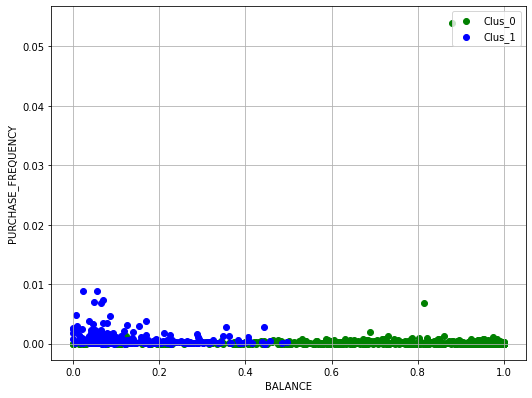

In [19]:
# visualize clusters for some of the features

dfc1 = dfc[dfc.CLUSTERS == 0]
dfc2 = dfc[dfc.CLUSTERS == 1]

plt.figure(figsize=(8.5,6.5))
plt.scatter(dfc1['BALANCE'],dfc1['PURCHASES_FREQUENCY'],color = 'green', label = 'Clus_0')
plt.scatter(dfc2['BALANCE'],dfc2['PURCHASES_FREQUENCY'],color = 'blue', label = 'Clus_1')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASE_FREQUENCY')
plt.grid()
plt.legend()
plt.show()